In [1]:
import sys
sys.path.append("..")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import math
import tensorflow as tf
import dynamics_model
import dynamics_subtractive_model

import tf_utils

In [4]:
from experiments.inverse import discretized_actionpred_subtractive_overfit

In [5]:
tf.reset_default_graph()
conf = discretized_actionpred_subtractive_overfit.get_conf()
model = dynamics_subtractive_model.DynamicsModel(conf)

setting up network
OrderedDict([('experiment_name', 'discretized_subtractive_actionpred'), ('data', 'ftrs_small'), ('data_dir', '/home/ashvin/lsdc/pushing_data/finer_temporal_resolution_substep10_small/train'), ('num_iterations', 50000), ('pretrained_model', ''), ('sequence_length', 15), ('skip_frame', 2), ('context_frames', 2), ('use_state', 1), ('model', 'CDNA'), ('num_masks', 10), ('schedsamp_k', 900.0), ('train_val_split', 0.95), ('batch_size', 32), ('learning_rate', 0.1), ('visualize', ''), ('file_visual', ''), ('discretize', 2)])
using frame sequence:  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
done with network setup


In [6]:
f = model.get_f()

Checkpoint found and restored: /home/ashvin/tf-lsdc/tf-data/tf_models/experiment_name_discretized_subtractive_actionpred/data_ftrs_small/num_iterations_50000/pretrained_model_/sequence_length_15/skip_frame_2/context_frames_2/use_state_1/model_CDNA/num_masks_10/schedsamp_k_900.0/train_val_split_0.95/batch_size_32/learning_rate_0.1/visualize_/file_visual_/discretize_2/model-0


In [7]:
result = f()

In [8]:
def softmax(w):
    e = np.exp(w)
    return e / np.sum(e)

In [9]:
softmax(result["pred_f0"])

array([[[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
        [ 0.00946638,  0.00617545]],

       [[ 0.0060674 ,  0.00954077],
  

In [19]:
print np.max(image_data)

0.694118


In [10]:
image_data, action_data, state_data = result["image"], result["action"], result["state"]

print 'action:', action_data.shape
print 'action: batch ind 0', action_data[0]
print 'action: batch ind 1', action_data[1]
print 'images:', image_data.shape

print 'states:', state_data.shape
print 'states: batch ind 0', state_data[0]
print 'states: batch ind 1', state_data[1]
print 'average speed in dir1:', np.average(state_data[:,:,3])
print 'average speed in dir2:', np.average(state_data[:,:,2])

action: (32, 15, 2)
action: batch ind 0 [[-2.78106117 -6.04772139]
 [-2.78106117 -6.04772139]
 [-2.78106117 -6.04772139]
 [ 2.09275508 -0.73327124]
 [ 2.09275508 -0.73327124]
 [ 2.09275508 -0.73327124]
 [ 1.69249308  0.74360341]
 [ 1.69249308  0.74360341]
 [ 1.69249308  0.74360341]
 [-1.53938437 -0.47815639]
 [-1.53938437 -0.47815639]
 [-1.53938437 -0.47815639]
 [-0.80930179 -3.56301475]
 [-0.80930179 -3.56301475]
 [-0.80930179 -3.56301475]]
action: batch ind 1 [[ 1.48580289 -5.86513281]
 [ 1.48580289 -5.86513281]
 [ 1.48580289 -5.86513281]
 [-0.0675795  -7.08122349]
 [-0.0675795  -7.08122349]
 [-0.0675795  -7.08122349]
 [-4.22449255  3.51213741]
 [-4.22449255  3.51213741]
 [-4.22449255  3.51213741]
 [ 6.31451845  5.51563311]
 [ 6.31451845  5.51563311]
 [ 6.31451845  5.51563311]
 [ 5.99322271  0.61074007]
 [ 5.99322271  0.61074007]
 [ 5.99322271  0.61074007]]
images: (32, 15, 64, 64, 3)
states: (32, 15, 4)
states: batch ind 0 [[-0.02098325  0.02592721 -0.09208991  0.16956443]
 [-0.0431

In [11]:
action_data.shape

(32, 15, 2)

(array([  15.,   27.,   60.,  165.,  180.,  219.,  138.,   93.,   51.,   12.]),
 array([-9.27250671, -7.45658131, -5.6406559 , -3.82473049, -2.00880508,
        -0.19287968,  1.62304573,  3.43897114,  5.25489655,  7.07082195,
         8.88674736]),
 <a list of 10 Patch objects>)

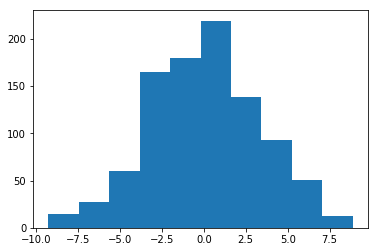

In [12]:
x = action_data.flatten()
plt.hist(x)

In [13]:
np.max(action_data)

8.8867474

In [14]:
np.min(action_data)

-9.2725067

In [15]:
image_data.shape

(32, 15, 64, 64, 3)

In [21]:
I = image_data[:, 0:14, :, :, :] - image_data[0, 1:15, :, :, :]
print I.min(), I.max()

-0.690196 0.647059


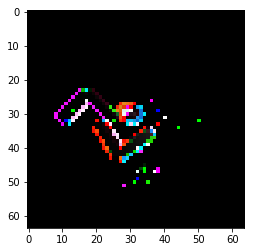

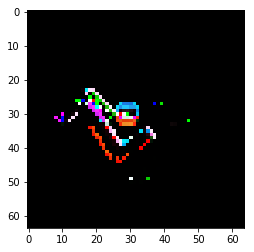

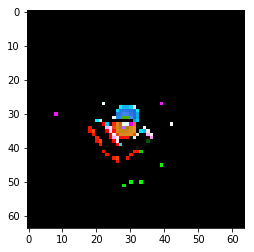

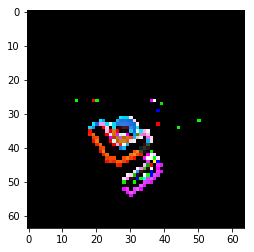

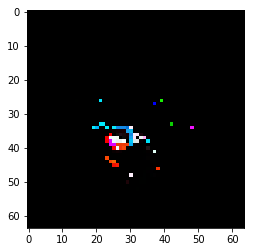

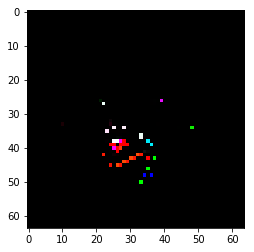

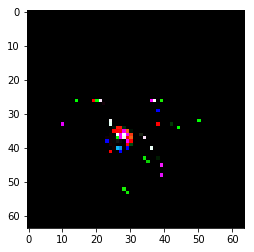

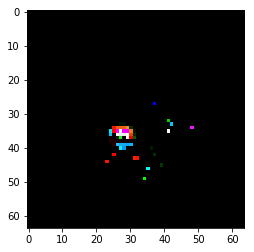

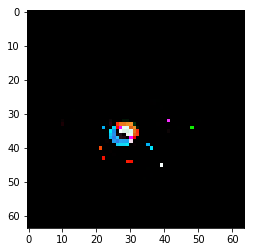

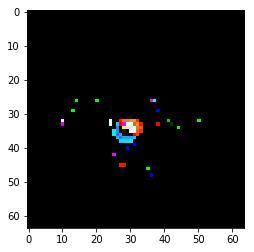

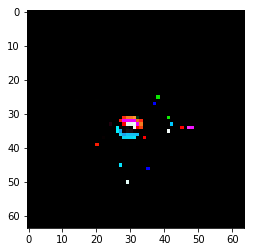

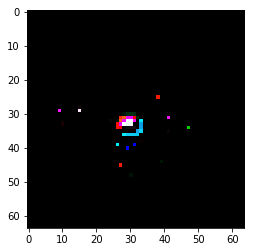

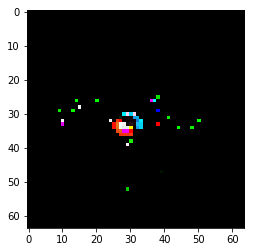

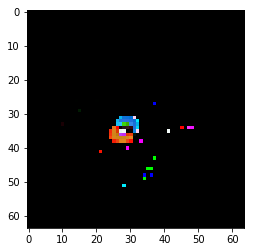

In [17]:
for i in range(14):
    plt.figure()
    plt.imshow(image_data[0, i, :, :, :] - image_data[0, i+1, :, :, :])

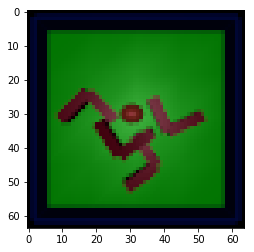

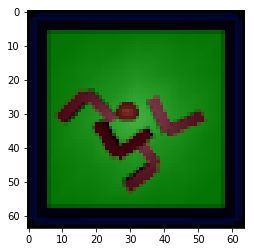

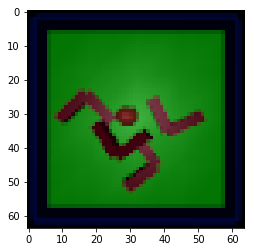

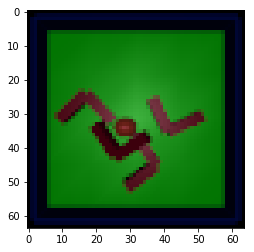

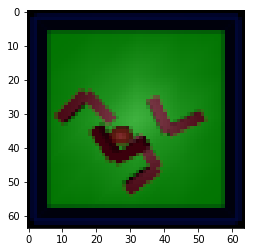

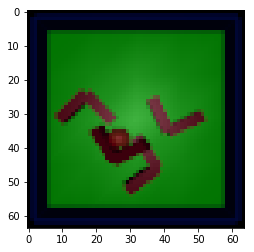

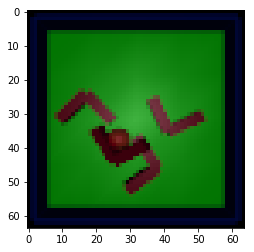

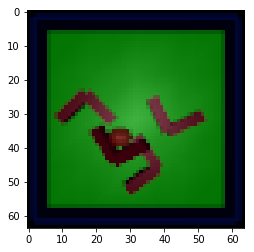

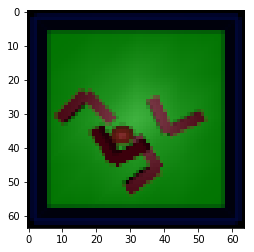

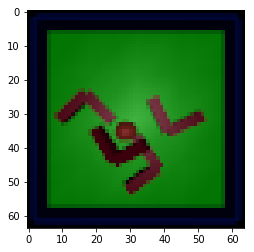

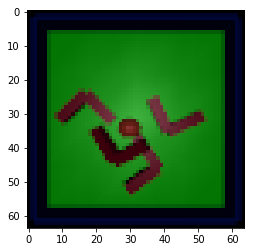

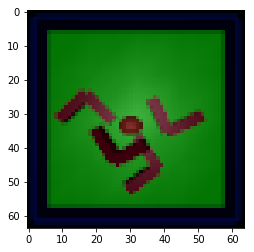

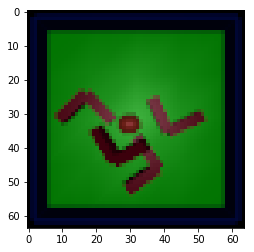

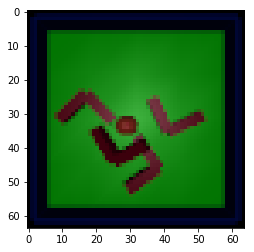

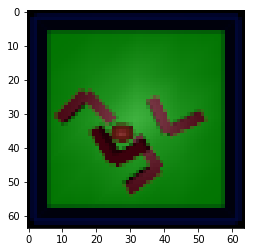

In [16]:
for i in range(15):
    plt.figure()
    plt.imshow(image_data[0, i, :, :, :])

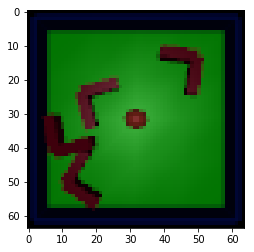

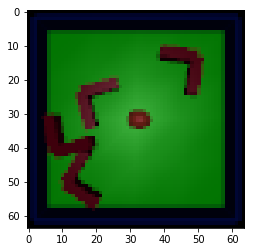

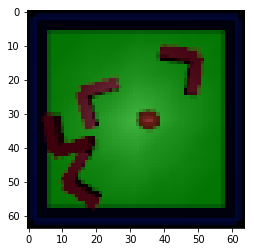

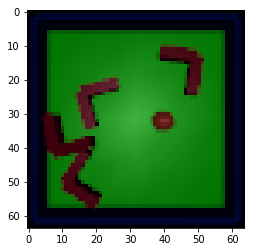

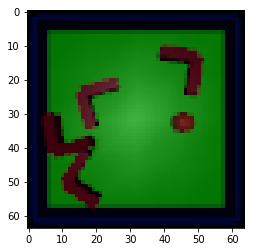

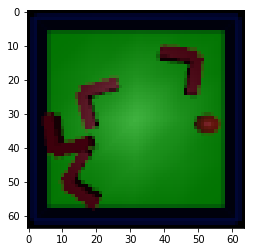

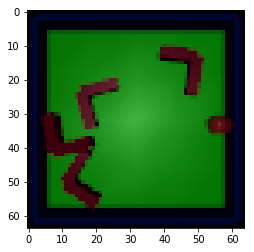

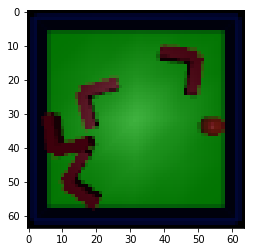

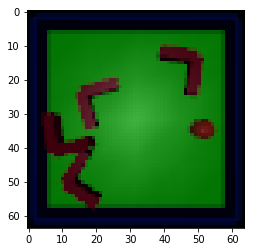

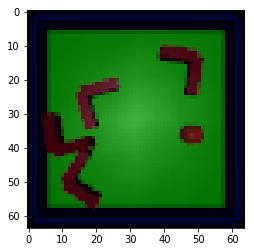

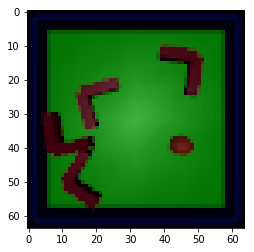

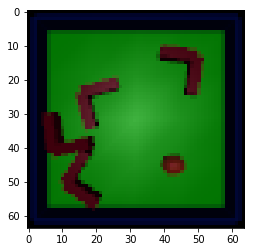

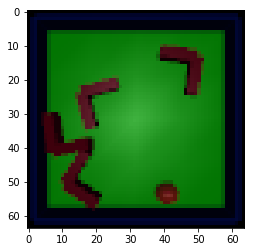

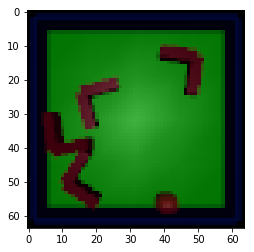

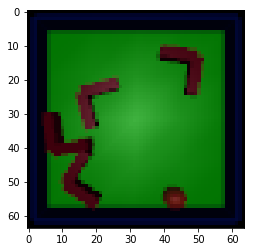

In [12]:
for i in range(15):
    plt.figure()
    plt.imshow(image_data[1, i, :, :, :])